In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
path_file = "/content/mental_health_finaldata_1.csv"

df_mentalhealth = pd.read_csv(path_file)
print(df_mentalhealth.shape)
df_mentalhealth.head()

(824, 13)


,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [ ]:
columnas_categoricas = ['Gender', 'Occupation', 'Mental_Health_History']

for columna in columnas_categoricas:
    print(f"Distribución de {columna}:")
    print(df_mentalhealth[columna].value_counts())
    print("\n")

Distribución de Gender:
Gender
Female    434
Male      390
Name: count, dtype: int64


Distribución de Occupation:
Occupation
Housewife    185
Student      180
Corporate    159
Others       155
Business     145
Name: count, dtype: int64


Distribución de Mental_Health_History:
Mental_Health_History
No       284
Maybe    282
Yes      258
Name: count, dtype: int64




In [ ]:
df_2 = df_mentalhealth.query('Gender == "Female" and Quarantine_Frustrations != "Maybe" and Growing_Stress != "Maybe"' )

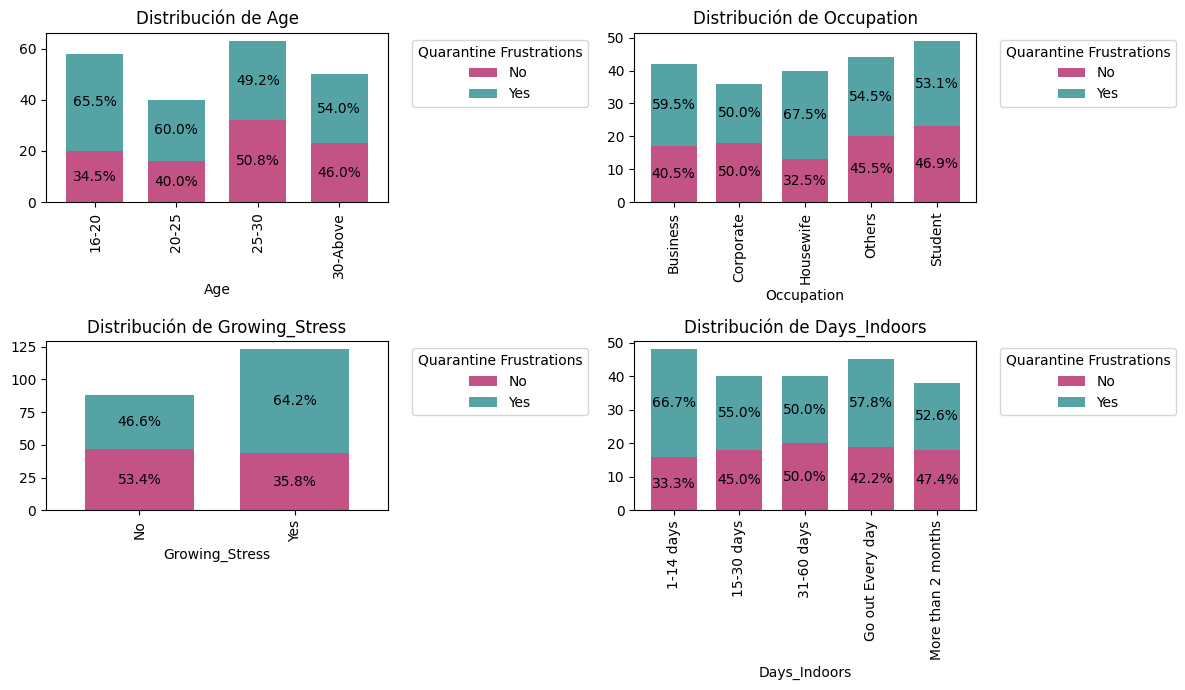

In [ ]:
#@title Relaciones entre las variables más representativas vs la variable Quarantine Frustations
categorical_columns = ['Age', 'Occupation', 'Growing_Stress', 'Days_Indoors']

plt.figure(figsize=(12, 7))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    #Tabla de contingencia
    crosstab = pd.crosstab(df_2[col], df_2['Quarantine_Frustrations'])

    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(1)
    colors = ["#C35285", "#56A3A6", "#17B586"]

    #Tabla de contingencia
    ax = crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors, width=0.7)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    #plt.ylabel('Número de Participantes')
    #plt.xticks(rotation=45)
    plt.legend(title='Quarantine Frustrations', bbox_to_anchor=(1.05, 1), loc='upper left')

 #Porcentajes
    for i in range(crosstab.shape[0]):
      for j in range(crosstab.shape[1]):
          ax.text(i, crosstab.iloc[i, :].cumsum()[j] - crosstab.iloc[i, :][j] / 2,
                  str(percentages.iloc[i, j]) + '%',
                  ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

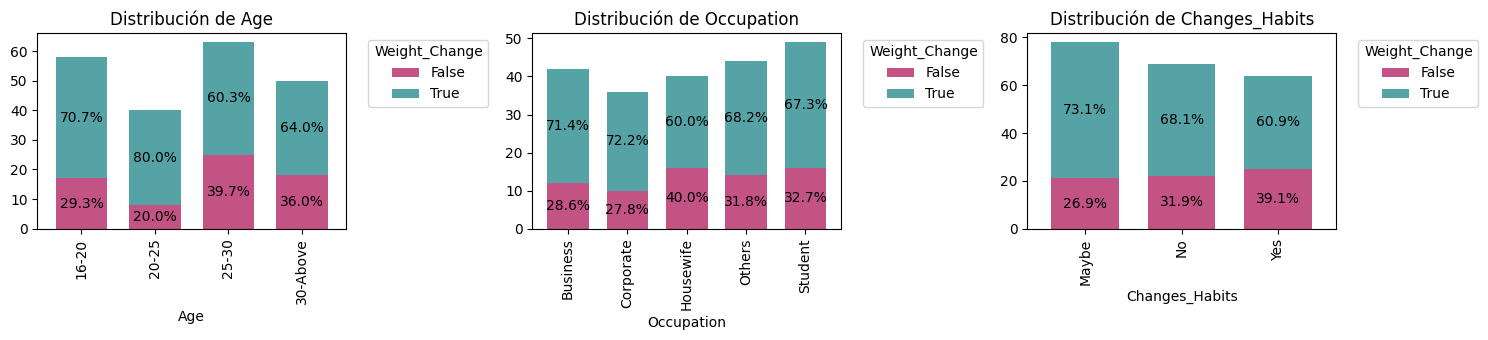

In [ ]:
#@title Otras relaciones entre variables
#@title Relaciones entre las variables vs la variable Growing Stress
categorical_columns = ['Age', 'Occupation', 'Changes_Habits']

plt.figure(figsize=(15, 3.5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    #Tabla de contingencia
    crosstab = pd.crosstab(df_2[col], df_2['Weight_Change']!="Maybe")

    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(1)
    colors = ["#C35285", "#56A3A6", "#17B586"]

    #Tabla de contingencia
    ax = crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors, width=0.7)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    #plt.ylabel('Número de Participantes')
    #plt.xticks(rotation=45)
    plt.legend(title='Weight_Change', bbox_to_anchor=(1.05, 1), loc='upper left')

 #Porcentajes
    for i in range(crosstab.shape[0]):
      for j in range(crosstab.shape[1]):
          ax.text(i, crosstab.iloc[i, :].cumsum()[j] - crosstab.iloc[i, :][j] / 2,
                  str(percentages.iloc[i, j]) + '%',
                  ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
#@title Propuesta de Modelo Bayesiano
from pgmpy.models.BayesianNetwork import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import BeliefPropagation

#Librerias PGMPY
import pgmpy.estimators as ests
from pgmpy.estimators import TreeSearch
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.metrics import structure_score

In [ ]:
#Librerias para aprendizaje automatico en Python
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
df_2.head(3)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [ ]:
#@title Nodos y Aristas

# H = Mental Health History
# M = Mood Swings
# S = Social Weakness
# A = Age
# O = Occupation
# C = Changes habits
# D = Days indoor
# P = Weight Change
# F = Quarantine Frustration
# G = Growing Stress

mentalHealth = BayesianNetwork([
    ('Mental_Health_History', 'Social_Weakness'),
    ('Mood_Swings', 'Social_Weakness'),
    ('Days_Indoors', 'Social_Weakness'),
    ('Days_Indoors', 'Quarantine_Frustrations'),

    ('Social_Weakness', 'Changes_Habits'),
    ('Age', 'Changes_Habits'),

    ('Occupation', 'Weight_Change'),
    ('Changes_Habits', 'Weight_Change'),

    ('Weight_Change', 'Growing_Stress'),
    ('Growing_Stress', 'Quarantine_Frustrations')
])

print("Nodos:", mentalHealth.nodes())
print("Aristas:", mentalHealth.edges())

Nodos: ['Mental_Health_History', 'Social_Weakness', 'Mood_Swings', 'Days_Indoors', 'Quarantine_Frustrations', 'Changes_Habits', 'Age', 'Occupation', 'Weight_Change', 'Growing_Stress']
Aristas: [('Mental_Health_History', 'Social_Weakness'), ('Social_Weakness', 'Changes_Habits'), ('Mood_Swings', 'Social_Weakness'), ('Days_Indoors', 'Social_Weakness'), ('Days_Indoors', 'Quarantine_Frustrations'), ('Changes_Habits', 'Weight_Change'), ('Age', 'Changes_Habits'), ('Occupation', 'Weight_Change'), ('Weight_Change', 'Growing_Stress'), ('Growing_Stress', 'Quarantine_Frustrations')]


In [ ]:
#@title CPDs
cpd_h  = TabularCPD("Mental_Health_History",  variable_card=3, values=[[0.31], [0.33], [0.36]])
cpd_m  = TabularCPD("Mood_Swings",  variable_card=3, values=[[0.34], [0.33], [0.33]])
cpd_a  = TabularCPD("Age",  variable_card=4, values=[[0.25], [0.21], [0.26], [0.28]])
cpd_o  = TabularCPD("Occupation",  variable_card=5, values=[[0.18], [0.17], [0.22], [0.20], [0.23]])
cpd_d  = TabularCPD("Days_Indoors",  variable_card=5, values=[[0.19], [0.19], [0.21], [0.21], [0.20]])

cpd_s = TabularCPD("Social_Weakness",   variable_card=3, values = [[0.56, 0.38, 0.67, 0.72, 0.38, 0.22, 0.33, 0.25, 0.00, 0.27, 0.20, 0.43, 0.40, 0.38, 0.31, 0.37, 0.75, 0.50, 0.22, 0.30, 0.25, 0.24, 0.37, 0.25, 0.25, 0.13, 0.25, 0.34, 0.34, 0.30, 0.20, 0.00, 0.47, 0.29, 0.28, 0.31, 0.43, 0.15, 0.20, 0.22, 0.18, 0.57, 0.25, 0.38, 0.34],
                                                     [0.11, 0.31, 0.11, 0.14, 0.38, 0.33, 0.47, 0.25, 0.60, 0.46, 0.30, 0.14, 0.50, 0.38, 0.15, 0.36, 0.25, 0.20, 0.33, 0.50, 0.12, 0.38, 0.00, 0.25, 0.42, 0.47, 0.58, 0.33, 0.33, 0.20, 0.50, 0.22, 0.15, 0.71, 0.45, 0.54, 0.43, 0.71, 0.40, 0.33, 0.38, 0.14, 0.50, 0.38, 0.13],
                                                     [0.33, 0.31, 0.22, 0.14, 0.24, 0.45, 0.20, 0.50, 0.40, 0.27, 0.50, 0.43, 0.10, 0.24, 0.54, 0.27, 0.00, 0.30, 0.45, 0.20, 0.63, 0.38, 0.63, 0.50, 0.33, 0.40, 0.17, 0.33, 0.33, 0.50, 0.30, 0.78, 0.38, 0.00, 0.27, 0.15, 0.14, 0.14, 0.40, 0.45, 0.44, 0.29, 0.25, 0.24, 0.53]],
                                            evidence =['Days_Indoors','Mental_Health_History','Mood_Swings'], evidence_card = [5,3,3])

cpd_c = TabularCPD("Changes_Habits",   variable_card =3, values=  [[0.35, 0.34, 0.34, 0.25, 0.37, 0.27, 0.39, 0.26, 0.50, 0.44, 0.29, 0.55],
                                                      [0.39, 0.37, 0.30, 0.39, 0.23, 0.31, 0.22, 0.30, 0.32, 0.25, 0.34, 0.30],
                                                      [0.26, 0.29, 0.36, 0.36, 0.40, 0.42, 0.39, 0.44, 0.18, 0.31, 0.37, 0.15]],
                                            evidence = ['Age','Social_Weakness'], evidence_card = [4,3])

cpd_p = TabularCPD("Weight_Change",   variable_card =3, values = [[0.35, 0.30, 0.41, 0.37, 0.54, 0.52, 0.28, 0.20, 0.40, 0.26, 0.18, 0.22, 0.32, 0.39, 0.39],
                                                      [0.18, 0.48, 0.41, 0.11, 0.33, 0.22, 0.39, 0.33, 0.33, 0.52, 0.56, 0.50, 0.42, 0.39, 0.26],
                                                      [0.47, 0.22, 0.18, 0.52, 0.13, 0.26, 0.33, 0.47, 0.27, 0.22, 0.26, 0.28, 0.26, 0.22, 0.35]],
                                            evidence =['Occupation','Changes_Habits'], evidence_card = [5, 3])

cpd_g = TabularCPD("Growing_Stress",   variable_card =3, values = [[0.43, 0.37, 0.40],
                                                      [0.25, 0.31, 0.35],
                                                      [0.32, 0.32, 0.25]],
                                            evidence =['Weight_Change'], evidence_card = [3])

cpd_f  = TabularCPD("Quarantine_Frustrations",  variable_card=3, values=[[0.47, 0.48, 0.20, 0.50, 0.32, 0.43, 0.30, 0.4, 0.13, 0.55, 0.29, 0.34, 0.50, 0.12, 0.39],
                                                   [0.22, 0.26, 0.40, 0.27, 0.36, 0.25, 0.35, 0.30, 0.37, 0.23, 0.39, 0.28, 0.21, 0.46, 0.32],
                                                   [0.31, 0.26, 0.40, 0.23, 0.32, 0.32, 0.35, 0.30, 0.50, 0.22, 0.32, 0.38, 0.29, 0.42, 0.29]],
                                            evidence =['Days_Indoors','Growing_Stress'], evidence_card = [5,3])


In [ ]:
mentalHealth.add_cpds(cpd_h, cpd_m, cpd_a, cpd_o, cpd_d, cpd_f, cpd_s, cpd_c, cpd_p, cpd_g)

In [ ]:
print("Modelo es correcto: ", mentalHealth.check_model())

Modelo es correcto:  True


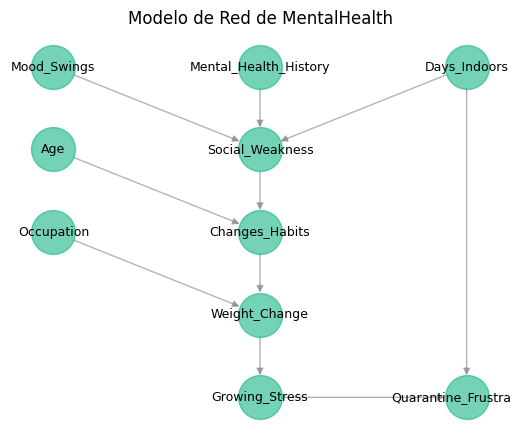

In [ ]:
#@title Propuesta inicial de Red de MentalHealth
import networkx as nx
import matplotlib.pyplot as plt
import pylab as plt

grafo = nx.DiGraph(mentalHealth.edges())

pos = {'Mood_Swings': (5,  20),
       'Mental_Health_History': (10, 20),
       'Days_Indoors': (15, 20),

       'Age': (5,  16),
       'Social_Weakness': (10, 16),

       'Changes_Habits': (10, 12),
       'Occupation': (5, 12),

       'Weight_Change': (10, 8),

       'Growing_Stress': (10, 4),
       'Quarantine_Frustrations': (15, 4)}

plt.figure(figsize=(5, 4))
nx.draw(grafo, pos=pos, with_labels=False, node_size=1000, node_color='#17B586', alpha=0.6, edge_color='gray')
nx.draw_networkx_labels(grafo, pos, font_size=9, font_color='black')

plt.title("Modelo de Red de MentalHealth")
plt.show()

In [ ]:
#@title CPDs de cada nodo
for cpd in mentalHealth.get_cpds():
    print(f"CPD de {cpd.variable}:")
    print(cpd)
    print("\n")

CPD de Mental_Health_History:
+--------------------------+------+
| Mental_Health_History(0) | 0.31 |
+--------------------------+------+
| Mental_Health_History(1) | 0.33 |
+--------------------------+------+
| Mental_Health_History(2) | 0.36 |
+--------------------------+------+


CPD de Mood_Swings:
+----------------+------+
| Mood_Swings(0) | 0.34 |
+----------------+------+
| Mood_Swings(1) | 0.33 |
+----------------+------+
| Mood_Swings(2) | 0.33 |
+----------------+------+


CPD de Age:
+--------+------+
| Age(0) | 0.25 |
+--------+------+
| Age(1) | 0.21 |
+--------+------+
| Age(2) | 0.26 |
+--------+------+
| Age(3) | 0.28 |
+--------+------+


CPD de Occupation:
+---------------+------+
| Occupation(0) | 0.18 |
+---------------+------+
| Occupation(1) | 0.17 |
+---------------+------+
| Occupation(2) | 0.22 |
+---------------+------+
| Occupation(3) | 0.2  |
+---------------+------+
| Occupation(4) | 0.23 |
+---------------+------+


CPD de Days_Indoors:
+-----------------+

In [ ]:
#@title Definición de los datos de entrada

In [ ]:
columns_to_drop = ['Gender', 'Coping_Struggles', 'Work_Interest']
df_2 = df_2.drop(columns=columns_to_drop)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df_2.columns:
    if df_2[column].dtype == 'object':
        le = LabelEncoder()
        df_2[column] = le.fit_transform(df_2[column])
        label_encoders[column] = le

In [ ]:
df_2.head(3)

,Age,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Social_Weakness
0,1,1,0,1,1,1,2,2,2,2
2,3,4,3,0,0,2,1,1,2,1
4,0,4,4,1,1,2,1,2,2,1


In [ ]:
X = df_2[['Age', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History','Weight_Change', 'Mood_Swings', 'Social_Weakness']]
y = df_2[["Quarantine_Frustrations"]]

In [ ]:
#@title Listado de variables e importancias ordenadas de mayor a menor correlación
fs = SelectKBest(score_func=chi2, k=8)
f_best = fs.fit_transform(X, y)

top_features = sorted(zip(list(X.columns), fs.scores_), key=lambda x: x[1], reverse=True)
top_features

[('Growing_Stress', 2.7132143601655785),
 ('Age', 2.0860831942319225),
 ('Social_Weakness', 1.8974713882608638),
 ('Days_Indoors', 1.3176913176913136),
 ('Mood_Swings', 0.4958526359261666),
 ('Changes_Habits', 0.3374351536788087),
 ('Occupation', 0.18692538692538657),
 ('Weight_Change', 0.0676731163573272),
 ('Mental_Health_History', 0.04992603550295874)]

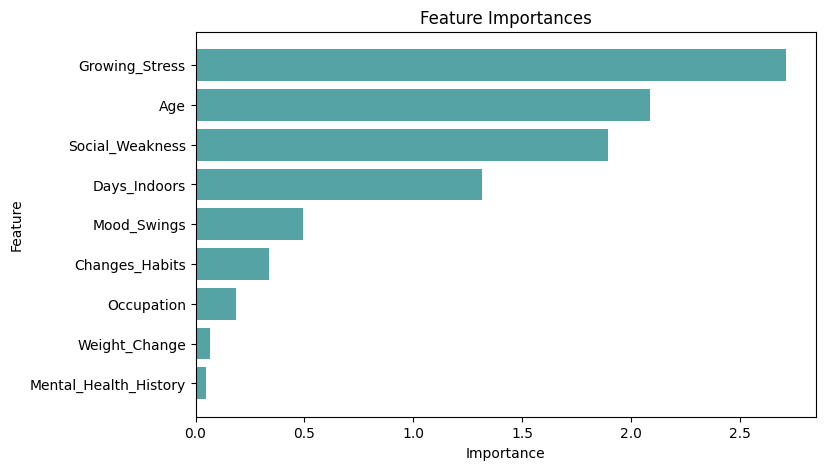

In [ ]:
# Listado de variables e importancias
variables = [
    ('Growing_Stress', 2.7132143601655785),
    ('Age', 2.0860831942319225),
    ('Social_Weakness', 1.8974713882608638),
    ('Days_Indoors', 1.3176913176913136),
    ('Mood_Swings', 0.4958526359261666),
    ('Changes_Habits', 0.3374351536788087),
    ('Occupation', 0.18692538692538657),
    ('Weight_Change', 0.0676731163573272),
    ('Mental_Health_History', 0.04992603550295874)
]

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(variables, columns=['Feature', 'Importance'])

# Ordenar el DataFrame por importancia
df = df.sort_values(by='Importance', ascending=False)

# Plotear la importancia de las características
plt.figure(figsize=(8, 5))
plt.barh(df['Feature'], df['Importance'], color='#56A3A6')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Cada una de las variables del dataframe tiene la misma probabilidad en el dataset
joint_probability = df_2.groupby([df_2.columns], axis=1).size()/df_2.shape[0]
pd.DataFrame(joint_probability)

,0
Age,0.004739
Changes_Habits,0.004739
Days_Indoors,0.004739
Growing_Stress,0.004739
Mental_Health_History,0.004739
Mood_Swings,0.004739
Occupation,0.004739
Quarantine_Frustrations,0.004739
Social_Weakness,0.004739
Weight_Change,0.004739


Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

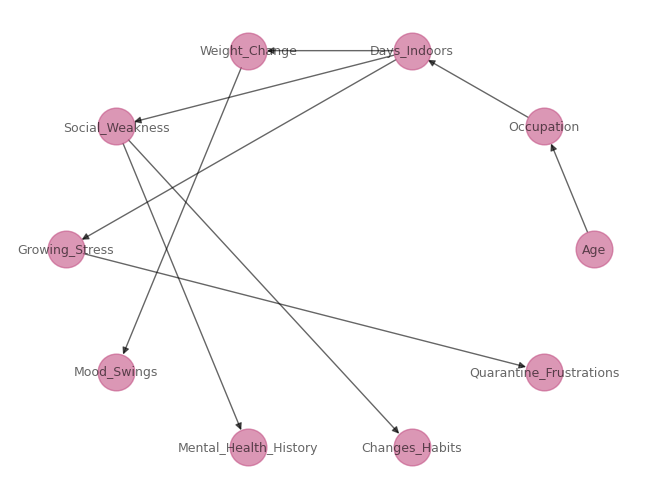

In [ ]:
#@title Propuesta de Red Bayesiana obtenida por Aprendizaje Estructurado
#Nodo raiz: Mental_Health_History
est = TreeSearch(df_2, root_node='Age')

#Red bayesiana obtenida por Aprendizaje Estructurado utilizando el estimador de tipo chow-liu
dag = est.estimate(estimator_type='chow-liu')

#Visualización del DAG
pos = nx.kamada_kawai_layout(dag) #spiral_layout, kamada_kawai_layout
nx.draw(dag, pos=pos, node_size=700, with_labels=True,node_color='#C35285', alpha=0.6, font_size=9)

In [ ]:
print("Nodos: ", dag.nodes())
print("Aristas: ", dag.edges())
print("Origen y destino de las Aristas")
nx.to_pandas_edgelist(dag)

Nodos:  ['Age', 'Occupation', 'Days_Indoors', 'Weight_Change', 'Social_Weakness', 'Growing_Stress', 'Mood_Swings', 'Mental_Health_History', 'Changes_Habits', 'Quarantine_Frustrations']
Aristas:  [('Age', 'Occupation'), ('Occupation', 'Days_Indoors'), ('Days_Indoors', 'Weight_Change'), ('Days_Indoors', 'Social_Weakness'), ('Days_Indoors', 'Growing_Stress'), ('Weight_Change', 'Mood_Swings'), ('Social_Weakness', 'Mental_Health_History'), ('Social_Weakness', 'Changes_Habits'), ('Growing_Stress', 'Quarantine_Frustrations')]
Origen y destino de las Aristas


,source,target,weight
0,Age,Occupation,None
1,Occupation,Days_Indoors,None
2,Days_Indoors,Weight_Change,None
3,Days_Indoors,Social_Weakness,None
4,Days_Indoors,Growing_Stress,None
5,Weight_Change,Mood_Swings,None
6,Social_Weakness,Mental_Health_History,None
7,Social_Weakness,Changes_Habits,None
8,Growing_Stress,Quarantine_Frustrations,None


In [ ]:
from pgmpy.estimators import TreeSearch, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.metrics import log_likelihood_score

learned_model = BayesianNetwork(dag.edges())
learned_model.fit(df_2, estimator=MaximumLikelihoodEstimator)
mentalHealth.fit(df_2, estimator=MaximumLikelihoodEstimator)

# Evaluación de los modelos
log_likelihood_proposed = log_likelihood_score(mentalHealth, df_2)
log_likelihood_learned = log_likelihood_score(learned_model, df_2)

print(f"Log-Likelihood del modelo propuesto: {log_likelihood_proposed}")
print(f"Log-Likelihood del modelo aprendido: {log_likelihood_learned}")

Log-Likelihood del modelo propuesto: -2314.6497997684874
Log-Likelihood del modelo aprendido: -2350.268459403412


In [ ]:
#@title CPDs de modelo propuesto MentalHealth
print(mentalHealth.get_cpds("Age"))
print("\n",mentalHealth.get_cpds("Growing_Stress"))
print("\n",mentalHealth.get_cpds("Quarantine_Frustrations"))
print("\n",mentalHealth.get_cpds("Days_Indoors"))

+--------+----------+
| Age(0) | 0.274882 |
+--------+----------+
| Age(1) | 0.189573 |
+--------+----------+
| Age(2) | 0.298578 |
+--------+----------+
| Age(3) | 0.236967 |
+--------+----------+

 +-------------------+--------------------+---------------------+--------------------+
| Weight_Change     | Weight_Change(0)   | Weight_Change(1)    | Weight_Change(2)   |
+-------------------+--------------------+---------------------+--------------------+
| Growing_Stress(0) | 0.4411764705882353 | 0.45454545454545453 | 0.3484848484848485 |
+-------------------+--------------------+---------------------+--------------------+
| Growing_Stress(1) | 0.5588235294117647 | 0.5454545454545454  | 0.6515151515151515 |
+-------------------+--------------------+---------------------+--------------------+

 +----------------------------+-----+---------------------+--------------------+
| Days_Indoors               | ... | Days_Indoors(4)     | Days_Indoors(4)    |
+----------------------------+-----+

In [ ]:
#@title Comparación de Precisión(accuracy) entre modelos
from sklearn.metrics import accuracy_score
y_pred_ModeloPropuesto = mentalHealth.predict(X)
y_pred_ModeloAprendizaje = learned_model.predict(X)

print('Accuracy del modelo de red bayesiano propuesto:', round(accuracy_score(y_pred_ModeloPropuesto, y)*100 ,2),'%')
print('Accuracy del modelo de red obtenido por aprendizaje estructurado:', round(accuracy_score(y_pred_ModeloAprendizaje, y)*100 ,2),'%')

  0%|          | 0/211 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  0%|          | 0/211 [00:00<?, ?it/s]

Accuracy del modelo de red bayesiano propuesto: 63.51 %
Accuracy del modelo de red obtenido por aprendizaje estructurado: 59.72 %


In [ ]:
#@title Cálculo de Inferencias
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation

In [ ]:
ve_mentalHealth  = VariableElimination(mentalHealth)
ve2_mentalHealth = VariableElimination(learned_model)

In [ ]:
#@title 1.¿Cuál es la probabilidad de experimentar cambios en el peso corporal dado que una persona ha reportado frustración durante la cuarentena?
query_result_1 = ve_mentalHealth.query(variables=['Weight_Change'], evidence = {'Quarantine_Frustrations':0})
print('Distribución de probabilidades: Modelo Propuesto \n', query_result_1)

query_result_2 = ve2_mentalHealth.query(variables=['Weight_Change'], evidence = {'Quarantine_Frustrations':0})
print("\nDistribución de probabilidades: Modelo de Aprendizaje Estructurado \n",query_result_2)

print('\nSegún el modelo propuesto, la probabilidad es de:', round(query_result_1.values[0]*100,2) ,'%')
print('Según el modelo de aprendizaje estructurado, la probabilidad es de:', round(query_result_2.values[0]*100,2) ,'%')

Distribución de probabilidades: Modelo Propuesto 
 +------------------+----------------------+
| Weight_Change    |   phi(Weight_Change) |
+==================+======================+
| Weight_Change(0) |               0.3244 |
+------------------+----------------------+
| Weight_Change(1) |               0.3716 |
+------------------+----------------------+
| Weight_Change(2) |               0.3040 |
+------------------+----------------------+

Distribución de probabilidades: Modelo de Aprendizaje Estructurado 
 +------------------+----------------------+
| Weight_Change    |   phi(Weight_Change) |
+==================+======================+
| Weight_Change(0) |               0.3220 |
+------------------+----------------------+
| Weight_Change(1) |               0.3655 |
+------------------+----------------------+
| Weight_Change(2) |               0.3126 |
+------------------+----------------------+

Según el modelo propuesto, la probabilidad es de: 32.44 %
Según el modelo de aprendiza

In [ ]:
#@title 2. ¿Cuál es la probabilidad de SÍ tener frustración dado que la persona ha estado MÁS DE 2 MESES en casa, SI ha experimentado cambios de peso y SI tiene estrés.
query_result_1 = ve_mentalHealth.query(variables=['Quarantine_Frustrations'], evidence = {'Days_Indoors':4, 'Weight_Change':0, 'Growing_Stress': 0})
print('Distribución de probabilidades: Modelo Propuesto \n', query_result_1)

query_result_2 = ve2_mentalHealth.query(variables=['Quarantine_Frustrations'], evidence = {'Days_Indoors':4, 'Weight_Change':0, 'Growing_Stress': 0})
print("\nDistribución de probabilidades: Modelo de Aprendizaje Estructurado \n",query_result_2)

print('\nSegún el modelo propuesto, la probabilidad es de:', round(query_result_1.values[0]*100,2) ,'%')
print('Según el modelo de aprendizaje estructurado, la probabilidad es de:', round(query_result_2.values[0]*100,2) ,'%')

Distribución de probabilidades: Modelo Propuesto 
 +----------------------------+--------------------------------+
| Quarantine_Frustrations    |   phi(Quarantine_Frustrations) |
+============================+================================+
| Quarantine_Frustrations(0) |                         0.7857 |
+----------------------------+--------------------------------+
| Quarantine_Frustrations(1) |                         0.2143 |
+----------------------------+--------------------------------+

Distribución de probabilidades: Modelo de Aprendizaje Estructurado 
 +----------------------------+--------------------------------+
| Quarantine_Frustrations    |   phi(Quarantine_Frustrations) |
+============================+================================+
| Quarantine_Frustrations(0) |                         0.5341 |
+----------------------------+--------------------------------+
| Quarantine_Frustrations(1) |                         0.4659 |
+----------------------------+-----------------

In [ ]:
#@title 3.¿Cuál es la probabilidad de que una ama de casa experimente cambios de hábitos alimenticios y de sueño?
query_result_1 = ve_mentalHealth.query(variables=['Occupation'], evidence = {'Changes_Habits':0})
print('Distribución de probabilidades: Modelo Propuesto \n', query_result_1)

query_result_2 = ve2_mentalHealth.query(variables=['Occupation'], evidence = {'Changes_Habits':0})
print("\nDistribución de probabilidades: Modelo de Aprendizaje Estructurado \n",query_result_2)

print('\nSegún el modelo propuesto, la probabilidad es de:', round(query_result_1.values[2]*100,2) ,'%')
print('Según el modelo de aprendizaje estructurado, la probabilidad es de:', round(query_result_2.values[2]*100,2) ,'%')

Distribución de probabilidades: Modelo Propuesto 
 +---------------+-------------------+
| Occupation    |   phi(Occupation) |
+===============+===================+
| Occupation(0) |            0.1991 |
+---------------+-------------------+
| Occupation(1) |            0.1706 |
+---------------+-------------------+
| Occupation(2) |            0.1896 |
+---------------+-------------------+
| Occupation(3) |            0.2085 |
+---------------+-------------------+
| Occupation(4) |            0.2322 |
+---------------+-------------------+

Distribución de probabilidades: Modelo de Aprendizaje Estructurado 
 +---------------+-------------------+
| Occupation    |   phi(Occupation) |
+===============+===================+
| Occupation(0) |            0.1987 |
+---------------+-------------------+
| Occupation(1) |            0.1707 |
+---------------+-------------------+
| Occupation(2) |            0.1898 |
+---------------+-------------------+
| Occupation(3) |            0.2089 |
+----

In [ ]:
#@title Trabajos a Futuro
from sklearn.naive_bayes import GaussianNB

# Crear el modelo de Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)

# Evaluar el modelo
accuracy = accuracy_score(y, y_pred)

print (accuracy)

0.6066350710900474


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)

# Evaluar el modelo
accuracy = accuracy_score(y, y_pred)

print (accuracy)

<ipython-input-309-37024d7de39c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


1.0


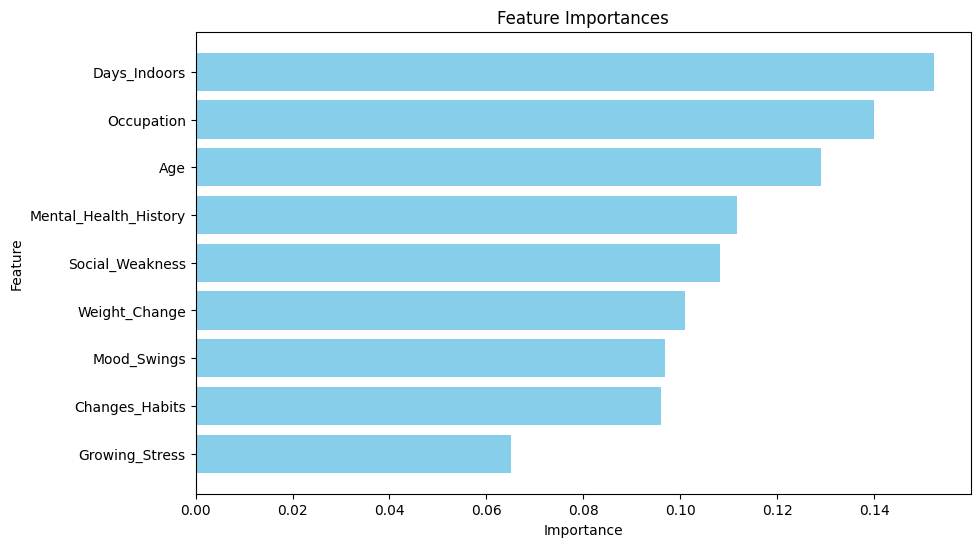

In [ ]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para facilitar la visualización
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar el DataFrame por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotear la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()